# <center><u>  Logistic Regression</u></center>
 It is a statistical method for analysing a data set in which there are one or more independent variables that determine an outcome. The outcome is measured with a dichotomous variable (in which there are only two possible outcomes). The goal of logistic regression is to find the best fitting model to describe the relationship between the dichotomous characteristic of interest (dependent variable = response or outcome variable) and a set of independent (predictor or explanatory) variables. This is better than other binary classification like nearest neighbor since it also explains quantitatively the factors that lead to classification.

- Logistic regression is a supervised learning classification algorithm used to predict the probability of a target variable. The nature of target or dependent variable is dichotomous, which means there would be only two possible classes.


- In simple words, the dependent variable is binary in nature having data coded as either 1 (stands for success/yes) or 0 (stands for failure/no).


- Mathematically, a logistic regression model predicts P(Y=1) as a function of X. It is one of the simplest ML algorithms that can be used for various classification problems such as spam detection, Diabetes prediction, cancer detection etc.

### Types of Logistic Regression
Generally, logistic regression means binary logistic regression having binary target variables, but there can be two more categories of target variables that can be predicted by it. Based on those number of categories, Logistic regression can be divided into following types −

**Binary or Binomial :-** In such a kind of classification, a dependent variable will have only two possible types either 1 and 0. For example, these variables may represent success or failure, yes or no, win or loss etc.


**Multinomial :-** In such a kind of classification, dependent variable can have 3 or more possible unordered types or the types having no quantitative significance. For example, these variables may represent “Type A” or “Type B” or “Type C”.

**Ordinal :-** In such a kind of classification, dependent variable can have 3 or more possible ordered types or the types having a quantitative significance. For example, these variables may represent “poor” or “good”, “very good”, “Excellent” and each category can have the scores like 0,1,2,3.

### Regression Models
**Binary Logistic Regression Model** − The simplest form of logistic regression is binary or binomial logistic regression in which the target or dependent variable can have only 2 possible types either 1 or 0.

**Multinomial Logistic Regression Model** − Another useful form of logistic regression is multinomial logistic regression in which the target or dependent variable can have 3 or more possible unordered types i.e. the types having no quantitative significance.

The simplest form of logistic regression is binary or binomial logistic regression in which the target or dependent variable can have only 2 possible types either 1 or 0. It allows us to model a relationship between multiple predictor variables and a binary/binomial target variable. In case of logistic regression, the linear function is basically used as an input to another function such as 𝑔 in the following relation −
![](_pic/img-LogisticRegression/Sigmoid00.png)
To sigmoid curve can be represented with the help of following graph. We can see the values of y-axis lie between 0 and 1 and crosses the axis at 0.5.
![](_pic/img-LogisticRegression/Sigmoid01.png)
The classes can be divided into positive or negative. The output comes under the probability of positive class if it lies between 0 and 1. For our implementation, we are interpreting the output of hypothesis function as positive if it is ≥0.5, otherwise negative.

We also need to define a loss function to measure how well the algorithm performs using the weights on functions, represented by theta as follows −
![](_pic/img-LogisticRegression/Sigmoid02.png)
Now, after defining the loss function our prime goal is to minimize the loss function. It can be done with the help of fitting the weights which means by increasing or decreasing the weights. With the help of derivatives of the loss function w.r.t each weight, we would be able to know what parameters should have high weight and what should have smaller weight.

The following gradient descent equation tells us how loss would change if we modified the parameters −
![](_pic/img-LogisticRegression/Sigmoid03.png)

![](_pic/img-LogisticRegression/knn_steps.PNG)

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [39]:
df=pd.read_csv('_dataset/Dataset-LogisticRegression/online_ads.csv')
print(len(df))
df.head()

400


,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [40]:
#df=pd.get_dummies(df)
df['Gender']=df.Gender.map({'Male':0,'Female':1,})
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,0,19,19000,0
1,0,35,20000,0
2,1,26,43000,0
3,1,27,57000,0
4,0,19,76000,0


In [41]:
#X=df.loc[:,('Age','EstimatedSalary','Gender_Female','Gender_Male')].values
X=df.loc[:,('Age','EstimatedSalary','Gender')].values
Y=df.loc[:,'Purchased'].values

**ML:**

In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [6]:
Model=StandardScaler()
X_new=Model.fit_transform(X.astype(float))

- **Predict**  will give either 0 or 1 as output
- **Predict_proba** will give the only probability of 1.

### All

In [72]:
Model=LogisticRegression()
Model.fit(X_new,Y)

LogisticRegression()

In [73]:
all_prob=Model.predict_proba(X_new)

In [74]:
all_prob[0]

array([0.99882286, 0.00117714])

In [75]:
Y[0]

0

In [76]:
pred=[]
for pb in all_prob:
    if(pb[0]<.50):
        pred.append(0)
    else:
        pred.append(1)

In [77]:
accuracy_score(Y,pred)

0.1475

Actual  1
[0.60145651 0.39854349]
1


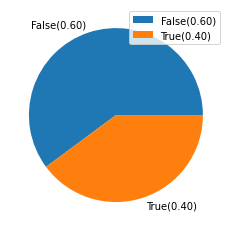

In [78]:
index=16
print("Actual ",Y[index])
pro=all_prob[index]
print(pro)
print(pred[index])
mylabels=['False({:.2f})'.format(float(pro[0])),'True({:.2f})'.format(float(pro[1]))]
plt.pie(pro, labels = mylabels)
plt.legend()
plt.show()

## Train Test Split

In [14]:
X_train,X_test,Y_train,Y_test=train_test_split(X_new,Y)

In [15]:
Model=LogisticRegression(solver='lbfgs')
Model.fit(X_train,Y_train)

LogisticRegression()

### Train

In [19]:
prob_train=Model.predict_proba(X_train)

In [27]:
mypred=[]
for pb in prob_train:
    if(pb[0]>=.65):
        mypred.append(0)
    else:
        mypred.append(1)
accuracy_score(Y_train,mypred)

0.8433333333333334

### Test

In [28]:
prob_test=Model.predict_proba(X_test)

In [29]:
mypred=[]
for pb in prob_test:
    if(pb[0]>=.65):
        mypred.append(0)
    else:
        mypred.append(1)
accuracy_score(Y_test,mypred)

0.84

In [36]:
# Example 1.

In [37]:
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
# prepare dataset
X, y = make_blobs(n_samples=100, centers=3, n_features=2)
# create and configure model
model = LogisticRegression()
# fit model
model.fit(X, y)

LogisticRegression()